## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### IMPORTING OF LIBRARIES

In [32]:
import pandas as pd # for reading our data
import numpy as np  # for performing calculations
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

import scipy.stats as stat # to calculate statistical operations
import statsmodels.api as sm
from statsmodels.formula.api import ols #for creating a model

from sklearn.model_selection import train_test_split # for performing train train_test_split on our data
from sklearn.linear_model import LinearRegression # making a LinearRegression model
from sklearn.metrics import mean_squared_error # for calculating error metrics to evaluate our model

### LOADING DATA INTO A DATAFRAME


In [33]:
kc_data_df = pd.read_csv('data/kc_house_data.csv') # reading our data into a pandas data frame
kc_data_df.head() # checking the first 5 rows


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Lets explore our data  by creating a function  data_summary to show us the info and shape of our data frame

In [34]:
def data_summary(data):# a function that gives us a brief summary of our data frame
 # Shape of Data
  shape = data.shape
  # Info of Data
  info = data.info()  

  # Combining the information into a single string
  summary = f"Dataframe Shape: {shape}\n"
  summary += f"Dataframe Info:\n{info}"  

  return summary




In [11]:
data_summary(kc_data_df) # using the function to obtain a summary of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

'Dataframe Shape: (21597, 21)\nDataframe Info:\nNone'

### DATA CLEANING



At these stage we will clean our data using the following steps

. **Completeness** (we will check for missing values , how they affect our data set and how we will handle them)

. **Consistency** (we will check for duplicate values and how to handle them)

. **Uniformity** ( we will check the data types as well as our columns naming for uniformity)

. **Validity** (we will handlle irrelevant columns and  check for outliers )

#### COMPLETENESS

In [35]:
# checking and summing up our missing values in our data set
kc_data_df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We seem to have missing values in our waterfront(2376),view(63) and yr_renovated(3842). We will have to investigate further

In [36]:
# lets check for the percentage of missing values in our data set
for col in kc_data_df.columns: # we are using a for loop to iterate over our data
    if kc_data_df[col].isnull().sum() > 0:
        percentage = (kc_data_df[col].isnull().sum()/len(kc_data_df[col]))*100
        print("The column", col,"has",kc_data_df[col].isnull().sum(),"missing values, which is", round(percentage, 1),"% of it's total")

The column waterfront has 2376 missing values, which is 11.0 % of it's total
The column view has 63 missing values, which is 0.3 % of it's total
The column yr_renovated has 3842 missing values, which is 17.8 % of it's total


Lets further check each column with missing values

###### Waterfront column

Lets check for the value count of the unique elements

In [37]:
#checking for unique elements value count
print("The Waterfront Column\n")

print("Number of distinct elements is:", kc_data_df['waterfront'].nunique(),"\n")

print("This is the count of unique values:")
print(kc_data_df['waterfront'].value_counts(),"\n")

print('The unique values:')
print(kc_data_df['waterfront'].unique(),"\n")

print("Number of missing values:",kc_data_df['waterfront'].isnull().sum())

The Waterfront Column

Number of distinct elements is: 2 

This is the count of unique values:
waterfront
NO     19075
YES      146
Name: count, dtype: int64 

The unique values:
[nan 'NO' 'YES'] 

Number of missing values: 2376


The two unique values are YES and NO.NO is the most common value in this column with(19875) entries, whilst YES has just (146). This indicates that the majority of these homes lack a waterfront, hence it seems reasonable to presume that the homes with missing values  lack a waterfront. it is safe to substitute the missing values with NO

In [38]:
# replacing missing values with 'NO'
kc_data_df['waterfront'].fillna('NO',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['waterfront'].value_counts())
print(kc_data_df['waterfront'].unique())

waterfront
NO     21451
YES      146
Name: count, dtype: int64
['NO' 'YES']


C:\Users\NDUTA\AppData\Local\Temp\ipykernel_15548\3834720533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kc_data_df['waterfront'].fillna('NO',inplace=True)


The change was successful because the number of NO entries increased from 19875 to 21451.

 ###### View column

Lets create a function to get our unique elements and sum up there value counts

In [39]:
def unique_counts(data, column): # creating a function for checking for unique elements and ther counts
    print("Number of distinct elements in", column, "column:", data[column].nunique())  # checking for unique elements in the column

    value_counts = data[column].value_counts()  # counting the value of each unique element

    # Use Series.apply with a Lambda Function
    format_lambda = lambda x: f"{x}: {value_counts[x]} ({value_counts[x] / len(data) * 100:.1f}%)"

    formatted_counts = value_counts.index.map(format_lambda)  # it will execute without creating the formatted_counts variable or printing its contents.
    print(formatted_counts)

    print(f"\nMissing values:", data[column].isnull().sum())  # combining the information


In [40]:
unique_counts(kc_data_df,'view')

Number of distinct elements in view column: 5
Index(['NONE: 19422 (89.9%)', 'AVERAGE: 957 (4.4%)', 'GOOD: 508 (2.4%)',
       'FAIR: 330 (1.5%)', 'EXCELLENT: 317 (1.5%)'],
      dtype='object', name='view')

Missing values: 63


In this column, NONE is the most frequent unique element. This indicates that the 63 missing values are representing homes  that don't have a view. Hence I WILL substitute  the missing values with NONE.

In [41]:
# replacing missing values with 'NONE'
kc_data_df['view'].fillna('NONE',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['view'].value_counts())
print(kc_data_df['view'].unique())

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


C:\Users\NDUTA\AppData\Local\Temp\ipykernel_15548\1296520491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kc_data_df['view'].fillna('NONE',inplace=True)


Changes successfully made

###### Yr_renovated column

In [42]:
unique_counts(kc_data_df,'yr_renovated' )# using the unique_count function

Number of distinct elements in yr_renovated column: 70
Index(['0.0: 17011 (78.8%)', '2014.0: 73 (0.3%)', '2013.0: 31 (0.1%)',
       '2003.0: 31 (0.1%)', '2007.0: 30 (0.1%)', '2000.0: 29 (0.1%)',
       '2005.0: 29 (0.1%)', '2004.0: 22 (0.1%)', '1990.0: 22 (0.1%)',
       '2009.0: 21 (0.1%)', '2006.0: 20 (0.1%)', '1989.0: 20 (0.1%)',
       '2002.0: 17 (0.1%)', '1984.0: 16 (0.1%)', '1991.0: 16 (0.1%)',
       '1998.0: 16 (0.1%)', '2010.0: 15 (0.1%)', '1983.0: 15 (0.1%)',
       '2001.0: 15 (0.1%)', '2008.0: 15 (0.1%)', '1999.0: 15 (0.1%)',
       '1987.0: 14 (0.1%)', '1985.0: 14 (0.1%)', '1986.0: 14 (0.1%)',
       '2015.0: 14 (0.1%)', '1994.0: 14 (0.1%)', '1992.0: 13 (0.1%)',
       '1995.0: 12 (0.1%)', '1993.0: 12 (0.1%)', '1997.0: 12 (0.1%)',
       '1988.0: 11 (0.1%)', '1996.0: 11 (0.1%)', '1970.0: 9 (0.0%)',
       '2011.0: 9 (0.0%)', '2012.0: 8 (0.0%)', '1982.0: 8 (0.0%)',
       '1980.0: 8 (0.0%)', '1968.0: 7 (0.0%)', '1979.0: 7 (0.0%)',
       '1977.0: 7 (0.0%)', '1964.0: 5 (0.

 The years span from 1948–2014 and 0.0 is the most frequent value thus  we'll replace the missing values with 0.0 because we don't know what 0.0 means based  on this data.

In [43]:
# replacing missing values with '0.0'
kc_data_df['yr_renovated'].fillna(0.0,inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['yr_renovated'].value_counts())
print(kc_data_df['yr_renovated'].unique())

yr_renovated
0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64
[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


C:\Users\NDUTA\AppData\Local\Temp\ipykernel_15548\1530365781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kc_data_df['yr_renovated'].fillna(0.0,inplace=True)


The changes are made successfully

In [44]:
# checking to see if there are any more missing values
kc_data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values

  #### CONSISTENCY

In [45]:
# Checking for duplicate values
kc_data_df.duplicated().sum()

0

There are no duplicate values

#### UNIFORMITY

**Converting  Data Types of Values in Columns from Object  to Float**

The sqft_basement values are in objects data type, given that this column has numeric values.  let's try to investigate  the reason why the datatype isn't a float or integer. 

In [46]:
kc_data_df['sqft_basement'].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

 These values represented by "?" string can be regarded as null values. We  will replace the "?"  with 0.0, because the majority of the values are at 0.0.

In [50]:
# replacing the ? with 0.0
kc_data_df['sqft_basement'].replace('?','0.0',inplace=True)

#converting column to data type 'float'
kc_data_df['sqft_basement'] = kc_data_df['sqft_basement'].astype(float)

#confirming the change 
kc_data_df['sqft_basement'].dtype

C:\Users\NDUTA\AppData\Local\Temp\ipykernel_15548\883872366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kc_data_df['sqft_basement'].replace('?','0.0',inplace=True)


dtype('float64')

We have successfully changed the data type to  a float

 **Converting the Date Column to month and year and Creating  new Columns  month and year**

The month and year the houses were sold are shown in the date column and data can be analysed easily by creating new columns called year and month  from this column, 

In [56]:
# Spliting the date into month, day, and year
date_split = kc_data_df['date'].str.split('/', expand=True)

# Creating new columns for month and year and converting the values to integers
kc_data_df['month_sold'] = date_split[0].astype(int)
kc_data_df['year_sold'] = date_split[2].astype(int)

# Droping the original date column
kc_data_df.drop(columns=['date'], inplace=True)

# Verifying the changes
print("DataFrame after splitting date:")
print(kc_data_df.head())


KeyError: 'date'

We can seen the two columns have been  created and added to our dataset

#### VALIDITY

In [55]:
#checking for outliers using intequatrile for each column

Q1 = kc_data_df.quantile(0.25) # First quartile
Q3 = kc_data_df.quantile(0.75) # Third quartile
IQR = Q3 - Q1

print(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

we have the above outliers lets visualize them using boxplots to investigate further

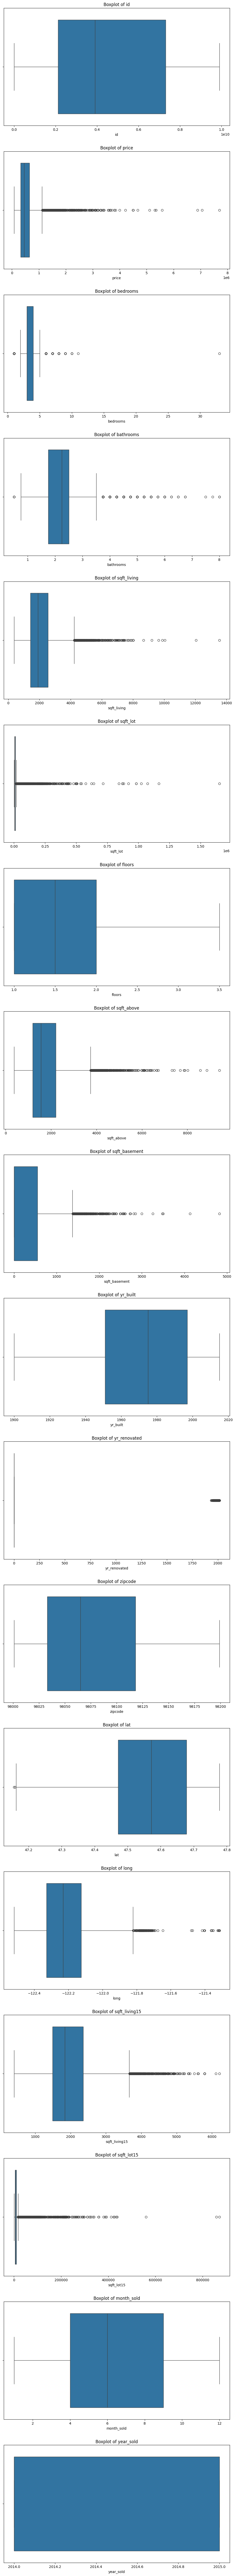

In [53]:

# Plotting box plots to visualize our outliers
# Creating a list of column names excluding non-numeric columns (if any)
numeric_columns = kc_data_df.select_dtypes(include=['number']).columns

# Seting up the figure and axes
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))

# Iterating over each numeric column and create a boxplot
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes  # If there's only one numeric column, axes is not a list
    
    # Creating the boxplots
    sns.boxplot(x=kc_data_df[column], ax=ax)
    
    # Seting titles and labels
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    

plt.tight_layout(pad=3.0)  # Adjusting the spacing between subplots
plt.subplots_adjust(top=0.95)  # Adjusting the top margin to accommodate titles   



There is a significant amount of outliers in a number of our columns let remove them

In [57]:
# Removing the outliers 
outliers_df_iqr = kc_data_df[~((kc_data_df < (Q1 - 1.5 * IQR)) |(kc_data_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(outliers_df_iqr.shape) # The number of rows and columns in the new dataframe

NameError: name 'Q1' is not defined

In [58]:
kc_data_df = outliers_df_iqr # storing our cleaned data in our original variable kc_data_df
kc_data_df.shape

NameError: name 'outliers_df_iqr' is not defined

we have removed our outliers  since they would have affected our model performance

## Exploratory Data Analysis

In [70]:
Numeric = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built']
Numeric

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

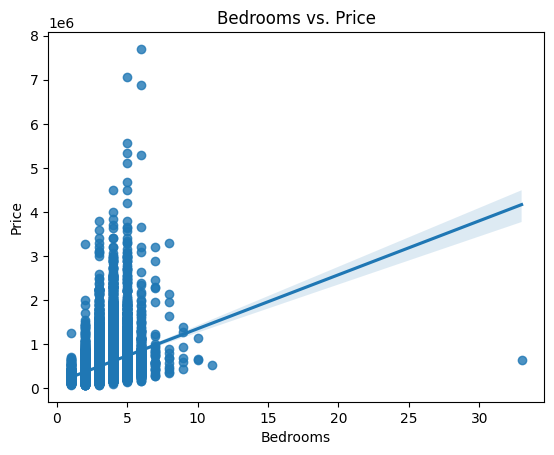

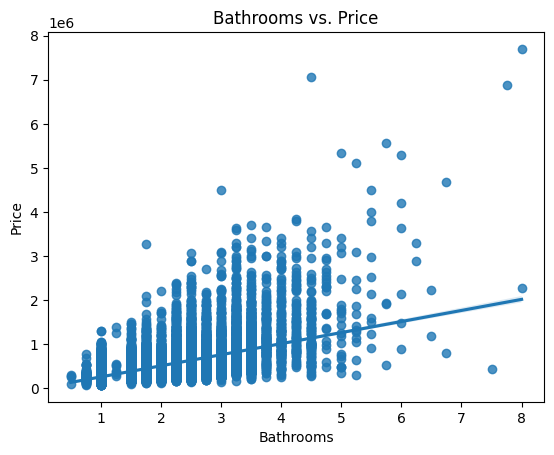

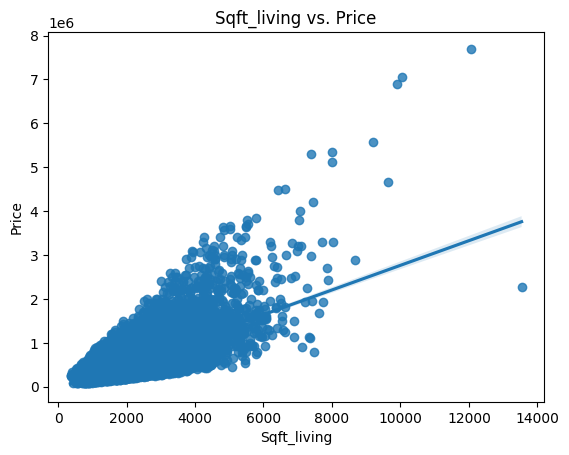

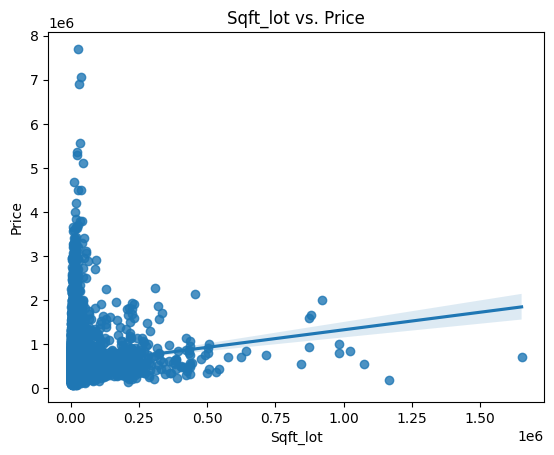

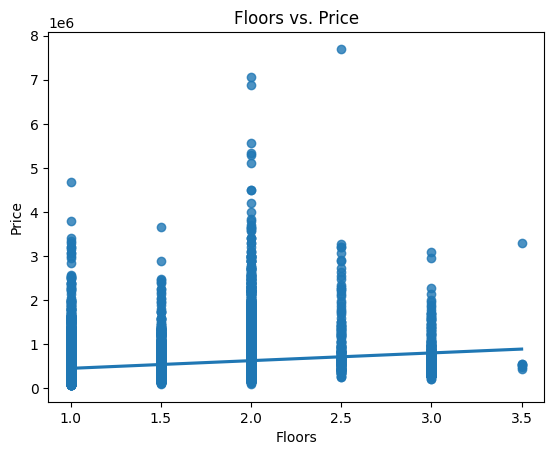

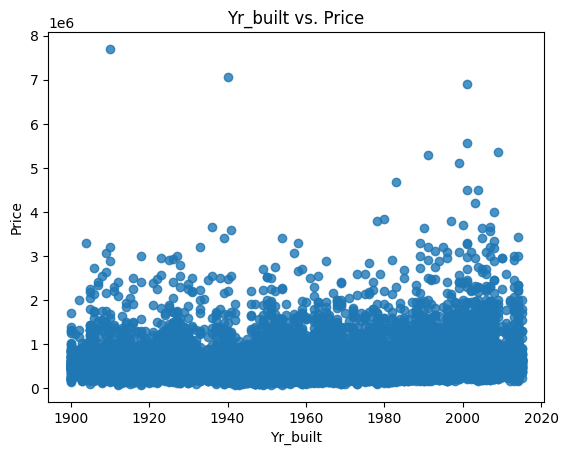

In [72]:
# Iterate through the variables and create scatter plots
for i in Numeric:
    sns.regplot(x=i, y='price', data=kc_data_df)
    plt.title(f'{i.capitalize()} vs. Price')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.show()

Only bathrooms and sqrt_living have a linear relationship with price

### FEATURE ENGINEERING

Lets create additional columns to determine the age of a house by getting the differnce between 2015 (that's when the data was last recorded) the reference year and yr_built, and another column age of the house after renovation by also getting the difference between 2015 and yr_renovated  

These new columns will help to determine whether the age of built or renovation has an impact on the price of the house

In [ ]:
# creating a new column 'age_built' showing the age of house since its was built upto 2015
kc_data_df['age_built'] = 2015 - kc_data_df['yr_built']

: 

In [ ]:
#creating a new column 'age_renovated'showing the age of a house after renovation
kc_data_df['age_renovated'] = 2015 - kc_data_df['yr_renovated'] 

: 

In [ ]:
kc_data_df.columns # checking to see if the two columns have been added

: 

In [ ]:
kc_data_df.head(10) # viewing the first ten rows of our data

: 

lets create a new column named  season_sold that tell us which at which season was a specific house sold at these will helps us to identify which season had the most sales and whether season determines the price of a house

In [ ]:
# creating a season dictonary using months in numerical order
season_dict = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}
# creating a new column and mapping it to season_dict
kc_data_df['season_sold'] = kc_data_df['month_sold'].map(season_dict)

: 

In [ ]:
kc_data_df # checking if the new column was added

: 

In [ ]:
kc_data_df.info()

: 

In [ ]:
#One hot encoding function
def one_hot_encode(df):
    
    # Identify categorical columns (assuming they are of type 'object' or 'category')
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding
    # `drop_first=True` can be used to drop the first level and avoid multicollinearity
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

: 

In [ ]:
#Function for linear regression
def linear_model(df):
    #Build linear regression model, return model and print model summary from statsmodels.
    #Create feature and target columns
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
    
    #Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
        
    #View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score * 100, 2),'%')
    print('Test Score:', round(test_score * 100, 2), '%')
    print('Coefficients:', model.coef_)
    
    #View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train).fit()
    print(sm_model.summary())
    return sm_model

: 

In [ ]:
kc_data_encoded = one_hot_encode(kc_data_df)

: 

In [ ]:
linear_model(kc_data_encoded)

: 

In [ ]:
#Dropping Irrelevant columns
kc_data_encoded.drop(columns=['id'], inplace=True)

: 

In [ ]:
#Rerun the model
linear_model(kc_data_encoded)

: 

: 